In [1]:
import numpy as np
import pandas as pd
from collections import UserDict, defaultdict
import json
import pickle
import ast

In [2]:
dict= {'activations_time': 0.45316004753112793,
 'fid': 3.3299173196610354e-08,
 'fid_time': 0.4601743221282959,
 'kid': -0.27056575,
 'kid_time': 7.3782408237457275,
 'precision': 1.0,
 'recall': 1.0,
 'f1_pr': 1.00001,
 'precision_time': 0.7771599292755127,
 'recall_time': 0.7771599292755127,
 'f1_pr_time': 0.7771599292755127,
 'density': 1.2053639846743296,
 'coverage': 1.0,
 'f1_dc': 1.0931303090896223,
 'density_time': 0.6621618270874023,
 'coverage_time': 0.6621618270874023,
 'f1_dc_time': 0.6621618270874023,
 'mmd_rbf': 0,
 'mmd_rbf_time': 1.262209177017212,
 'mmd_linear': 0.0,
 'mmd_linear_time': 0.45316004753112793,
 'nspdk_mmd': 0.08083532491372947,
 'nspdk_mmd_time': 14.770469427108765,
 'valid': 1.0,
 'unique@1000': 1.0,
 'unique@10000': 1.0,
 'FCD/Test': 0.06483010510226318,
 'SNN/Test': 1.0,
 'Frag/Test': 0.9985447050085542,

 'FCD/TestSF': 53.23109144992008,
 'SNN/TestSF': 0.09263560138642787,
 'Frag/TestSF': 0.0,

 'IntDiv': 0.27166667461395255,
 'IntDiv2': 0.2488384959538309,
 'Filters': 1.0,
 'logP': 1.0247960207991231,
 'SA': 0.08714412133552243,
 'QED': 0.0421093380466714,
 'weight': 61.472655391351964,
 'Novelty': 1.0,
 'AUC_ROC_based_metric_with_nspdk': 0.0,
 'AUC_ROC_based_metric_with_nspdk_time': 122.63310122489929,
 'AUC_ROC_based_metric_with_nn_classifier': 0,
 'AUC_ROC_based_metric_with_nn_classifier_time': 167.09346532821655,
 'dataset': 'bbb_martins'}

In [3]:
import json
with open('smiles_datasets_experiments.txt', 'a+') as f:
     f.write(json.dumps(dict) +'\n')
     

In [47]:
def send_to_dataframe(l):
    r=pd.DataFrame.from_dict(l[0],orient='index')
    #print(r)
    for i  in l[1:]:
        #print(e)
        e=pd.DataFrame.from_dict(i,orient='index')
        r=pd.concat([r, e], axis=1)
        #print(r)
    df=r.T.reset_index().drop(columns=['index'])
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df

list_of_dictionaries=[]
for line in  open("smiles_datasets_experiments.txt", "r"):
    line=line.rstrip('\n')
    print(line)
    dictionary = ast.literal_eval(line)
    list_of_dictionaries.append(dictionary)


df=send_to_dataframe(list_of_dictionaries) 
df

{"activations_time": 0.45316004753112793, "fid": 3.3299173196610354e-08, "fid_time": 0.4601743221282959, "kid": -0.27056575, "kid_time": 7.3782408237457275, "precision": 1.0, "recall": 1.0, "f1_pr": 1.00001, "precision_time": 0.7771599292755127, "recall_time": 0.7771599292755127, "f1_pr_time": 0.7771599292755127, "density": 1.2053639846743296, "coverage": 1.0, "f1_dc": 1.0931303090896223, "density_time": 0.6621618270874023, "coverage_time": 0.6621618270874023, "f1_dc_time": 0.6621618270874023, "mmd_rbf": 0, "mmd_rbf_time": 1.262209177017212, "mmd_linear": 0.0, "mmd_linear_time": 0.45316004753112793, "nspdk_mmd": 0.08083532491372947, "nspdk_mmd_time": 14.770469427108765, "valid": 1.0, "unique@1000": 1.0, "unique@10000": 1.0, "FCD/Test": 0.06483010510226318, "SNN/Test": 1.0, "Frag/Test": 0.9985447050085542, "FCD/TestSF": 53.23109144992008, "SNN/TestSF": 0.09263560138642787, "Frag/TestSF": 0.0, "IntDiv": 0.27166667461395255, "IntDiv2": 0.2488384959538309, "Filters": 1.0, "logP": 1.0247960

,dataset,activations_time,fid,fid_time,kid,kid_time,precision,recall,f1_pr,precision_time,...,Filters,logP,SA,QED,weight,Novelty,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time,AUC_ROC_based_metric_with_nn_classifier,AUC_ROC_based_metric_with_nn_classifier_time
0,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
1,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
2,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
3,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
4,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
5,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
6,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
7,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
8,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
9,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465


In [26]:
df.columns

Index(['dataset', 'activations_time', 'fid', 'fid_time', 'kid', 'kid_time',
       'precision', 'recall', 'f1_pr', 'precision_time', 'recall_time',
       'f1_pr_time', 'density', 'coverage', 'f1_dc', 'density_time',
       'coverage_time', 'f1_dc_time', 'mmd_rbf', 'mmd_rbf_time', 'mmd_linear',
       'mmd_linear_time', 'nspdk_mmd', 'nspdk_mmd_time', 'valid',
       'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test', 'Frag/Test',
       'FCD/TestSF', 'SNN/TestSF', 'Frag/TestSF', 'IntDiv', 'IntDiv2',
       'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty',
       'AUC_ROC_based_metric_with_nspdk',
       'AUC_ROC_based_metric_with_nspdk_time',
       'AUC_ROC_based_metric_with_nn_classifier',
       'AUC_ROC_based_metric_with_nn_classifier_time'],
      dtype='object')

In [30]:
df

,dataset,activations_time,fid,fid_time,kid,kid_time,precision,recall,f1_pr,precision_time,...,Filters,logP,SA,QED,weight,Novelty,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time,AUC_ROC_based_metric_with_nn_classifier,AUC_ROC_based_metric_with_nn_classifier_time
0,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
1,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
2,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
3,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
4,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
5,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
6,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
7,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
8,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465
9,bbb_martins,0.45316,0.0,0.460174,-0.270566,7.378241,1.0,1.0,1.00001,0.77716,...,1.0,1.024796,0.087144,0.042109,61.472655,1.0,0.0,122.633101,0,167.093465


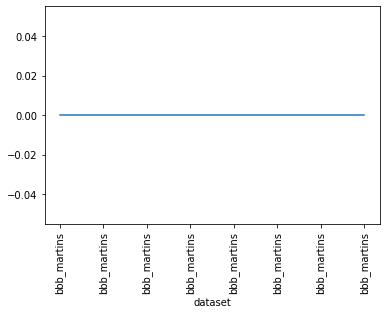

In [65]:
x=df.set_index('dataset',drop=True)['AUC_ROC_based_metric_with_nn_classifier']
ax =x.plot.line(rot=90, subplots=True)

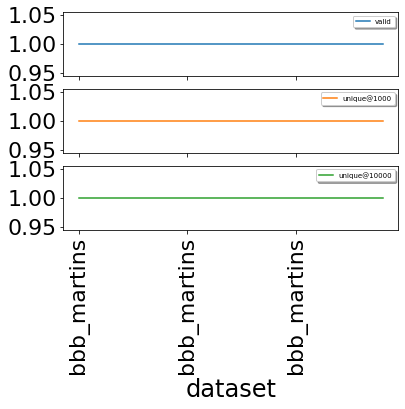

In [80]:

x=df.set_index('dataset',drop=True)[molecular_metrics[:3]]
ax =x.plot.line(rot=90, subplots=True)


legend = ax[0].legend(loc='upper right', shadow=True, fontsize='xx-small')
legend = ax[1].legend(loc='upper right', shadow=True, fontsize='xx-small')
legend = ax[2].legend(loc='upper right', shadow=True, fontsize='xx-small')


In [66]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import os


generators=['STGG']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
structural_metrics = ['wl_mmd', 'clustering_mmd', 'degree_mmd', 'orbits_mmd', 'nspdk_mmd']

dont_plot = ['wl_mmd']
to_plot = [metric for metric in nn_metrics + structural_metrics if metric not in dont_plot]
print(to_plot)

molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']

new_metrics=['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']

all_metrics = list(set(nn_metrics + structural_metrics + molecular_metrics + new_metrics ))
metrics_types=['nn_metrics','structural_metrics','molecular_metrics','new_metrics']

cmapper = np.linspace(0, 1, len(to_plot))
cmapper = {key: cmapper[ix] for ix, key in enumerate(to_plot)}
cmap = plt.get_cmap('viridis')
def get_color(metric):
    return cmap(cmapper[metric])

cmapper_qualitative = {}
for c_ix, key in enumerate(to_plot):
    c_ix *= 2
    if c_ix >= 20:
        c_ix = (c_ix % 20) + 1
    cmapper_qualitative[key] = plt.cm.tab20(c_ix)
                      
def get_color_qualitative(metric):
    return cmapper_qualitative[metric]


def should_plot(metric):
    return metric not in dont_plot

def get_label(metric):
    metric_to_label = {'mmd_linear': 'MMD Linear',
                       'mmd_rbf': 'MMD RBF',
                       'fid': 'FD',
                       'kid': 'KD',
                        'nspdk_mmd': 'NSPDK MMD',
                       'degree_mmd': 'Degree MMD',
                       'clustering_mmd': 'Clustering MMD',
                       'wl_mmd': 'WL MMD',
                       'orbits_mmd': 'Orbits MMD',
                       'f1_pr': 'F1 PR',
                       'f1_dc': 'F1 DC',
                       'AUC_ROC_based_metric_with_nspdk': 'New metric NSPDK',
                       'AUC_ROC_based_metric_with_nn_classifier': 'New metric NN',}
#                        
    
    if metric in metric_to_label:
        return metric_to_label[metric]
    elif '_' not in metric: # PRDC
        return metric.title()
    elif 'mmd' not in metric: # F1 scores
        return ' '.join(metric.split('_')).upper()

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=24) # 26     # fontsize of the axes title
plt.rc('axes', labelsize=24)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=22)    # fontsize of the tick labels
plt.rc('ytick', labelsize=22)    # fontsize of the tick labels
plt.rc('legend', fontsize=24)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title\

['precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear', 'mmd_rbf', 'clustering_mmd', 'degree_mmd', 'orbits_mmd', 'nspdk_mmd']


In [39]:
ames_filter=df.loc[df['dataset']=='ames' ]
bbb_martins_filter=df.loc[df['dataset']=='bbb_martins' ]
cyp1a2_veith_filter=df.loc[df['dataset']=='cyp1a2_veith' ]
cyp2c19_veith_filter=df.loc[df['dataset']=='cyp2c19_veith' ]
herg_karim_filter=df.loc[df['dataset']=='herg_karim' ]
lipophilicity_astrazeneca_filter=df.loc[df['dataset']=='lipophilicity_astrazeneca' ]


# Print results per datasets


In [69]:
experiments =generators
metrics_to_avoid = ['fid', 'kid', 'mmd_linear']



In [86]:
metrics = ['nn_metrics']
results = {key: [] for key in metrics}

#differences based on metrics types per dataset
datasets=['bbb_martins']
for i in datasets:
     for ix, row in df.iterrows():
         """
         if row['dataset']==i:
            metric = row['metric']
         """
         metric=row[eval(f'{metrics[0]}')].values
         #print(metric)
         results[metrics[0]].append(metric)
results

{'nn_metrics': [array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], dtype=object),
  array([1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
         3.3299173196610354e-08, -0.27056575, 0.0, 0], 

In [ ]:
#differences based on metrics types per generators 

In [ ]:
#New metric response  for each generator 

{'nn_metrics': array([[1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08, -0.27056575, 0.0, 0],
       [1.0, 1.2053639846743296, 1.0, 1.0, 1.00001, 1.0931303090896223,
        3.3299173196610354e-08,

TypeError: 'AxesSubplot' object is not subscriptable

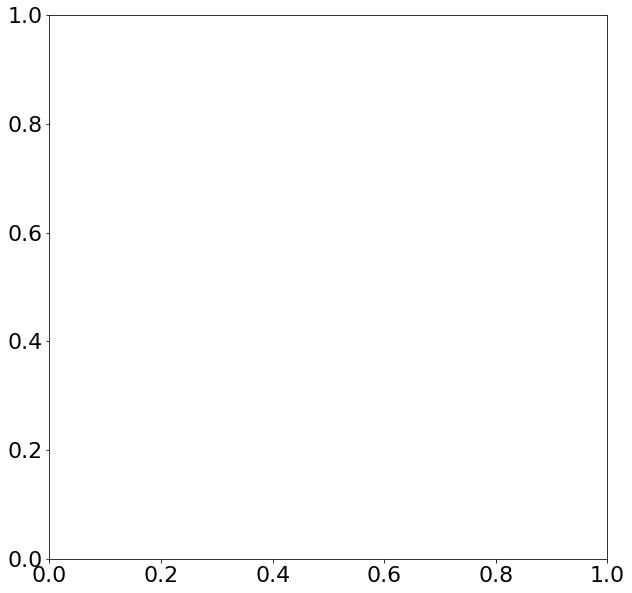

In [98]:
linestyles = {'mmd_rbf': {'linestyle': '-', 'marker': 'X'},
              'f1_pr': {'linestyle': '-', 'marker': 'o'},
              'f1_dc': {'linestyle': '-', 'marker': 'v'},
              'coverage': {'linestyle': '-.', 'marker': 'X'},
              'recall': {'linestyle': '-.', 'marker': 'o'},
              'density': {'linestyle': ':', 'marker': 'X'},
              'precision': {'linestyle': ':', 'marker': 'o'},
              'orbits_mmd': {'linestyle': '--', 'marker': 'X'},
              'clustering_mmd': {'linestyle': '--', 'marker': 'o'},
              'degree_mmd': {'linestyle': '--', 'marker': 'v'},
              'nspdk_mmd': {'linestyle': '--', 'marker': '^'},
              'wl_mmd': {'linestyle': '--', 'marker': '^'}}
fig, axes = plt.subplots(1, 1, figsize=(10, 10))

for key, result in results.items():
    if key in metrics_to_avoid:
        continue
    results[key] = np.concatenate([res.reshape(1, -1) for res in result], axis=0)
print(results) 
x_axis = np.arange(0, 1, 0.01)
mean = np.mean(results[key], axis=0)
print(mean)
#std = np.std(results[key], axis=0)
try:
    kwargs = linestyles['nn_metrics']
except:
    print(key, 'not in ls')

axes[0].plot(x_axis, mean, color=get_color_qualitative(key), label=get_label(key), markevery=5, **kwargs) #markersize=8, lw=3, **kwargs)
#         if key in mmd_metrics:
#             axs.fill_between(x_axis, mean + std, mean - std, color=get_color_qualitative(key), alpha=0.3)


In [ ]:
linestyles = {'mmd_rbf': {'linestyle': '-', 'marker': 'X'},
              'f1_pr': {'linestyle': '-', 'marker': 'o'},
              'f1_dc': {'linestyle': '-', 'marker': 'v'},
              'coverage': {'linestyle': '-.', 'marker': 'X'},
              'recall': {'linestyle': '-.', 'marker': 'o'},
              'density': {'linestyle': ':', 'marker': 'X'},
              'precision': {'linestyle': ':', 'marker': 'o'},
              'orbits_mmd': {'linestyle': '--', 'marker': 'X'},
              'clustering_mmd': {'linestyle': '--', 'marker': 'o'},
              'degree_mmd': {'linestyle': '--', 'marker': 'v'},
              'nspdk_mmd': {'linestyle': '--', 'marker': '^'},
              'wl_mmd': {'linestyle': '--', 'marker': '^'},
#               'mmd_rbf_quadratic_single': {'linestyle': '-', 'marker': '>'}
             }
plt.rc('legend', fontsize=16)    # legend fontsize

def plot_line_plot(df, axs, exps, datasets, metrics=to_plot, title=None):
# for exp in experiments:
#     if type (exps) == list:
    
#     else:

    results = {key: [] for key in exps}

#     fig, axs = plt.subplots(figsize=(12.5, 10)) # To plot just comp-eff quantity
    for exp in exps:
       for i in datasets:
       #differences based on metrics types per dataset
          for ix, row in df.iterrows():
             if row['dataset']==i:
                 metric=row[eval(f'{exp}')].values
                 results[exp].append(metric)
             
            
    for key, result in results.items():
        if key in metrics_to_avoid:
            continue
        results[key] = np.concatenate([res.reshape(1, -1) for res in result], axis=0)

        x_axis = np.arange(0, 1, 0.01)
        mean = np.mean(results[key], axis=0)
        std = np.std(results[key], axis=0)
        try:
            kwargs = linestyles[key]
        except:
            print(key, 'not in ls')
            continue
        axs.plot(x_axis, mean, color=get_color_qualitative(key), label=get_label(key), markevery=5, **kwargs) #markersize=8, lw=3, **kwargs)
#         if key in mmd_metrics:
#             axs.fill_between(x_axis, mean + std, mean - std, color=get_color_qualitative(key), alpha=0.3)
        axs.set_ylabel(r'$\hat \rho(\mathbb{S}_g, \mathbb{S}_r)$')
        axs.set_xlabel(r'Degree of perturbation')
#         axs.set_xlabel(r'Ratio ($t$)')
#         if title is None:
#             axs.set_title(get_experiment_title(exps[0]))
#         else:
#             axs.set_title(title)
        axs.set_ylim(-0.01, 1.1)

#     leg = axs.legend(loc='lower right', ncol=3)
    
#     for text in leg.get_texts():
#         metric = text.get_text()
#         if 'MMD' in metric and 'RBF' not in metric:
#             color = 'b'
#         else:
#             color = 'r'
#         plt.setp(text, color=color)

    # Get the bounding box of the original legend
#     bb = leg.get_bbox_to_anchor().inverse_transformed(axs.transAxes)

#     # Change to location of the legend. 
#     # xOffset = 0.2 # Play with this to tweak position of legend
#     yOffset = 0.6 # Play with this to tweak position of legend
#     bb.y0 -= yOffset
#     bb.y1 -= yOffset
#     xOffset = -0
#     bb.x0 -= xOffset
#     bb.x1 -= xOffset
#     leg.set_bbox_to_anchor(bb, transform = axs.transAxes)
    
#     fig.savefig(exp + '.jpg', bbox_inches='tight')


In [ ]:
to_plot='nspdk_mmd'
fig, axes = plt.subplots(1, 3, figsize=(27, 5))
experiments= [ 'nn_metrics']
for exp in experiments:
    plot_line_plot(df,axes[0], exp, datasets, metrics=[metric for metric in nn_metrics if metric in to_plot], title='NN metrics')
    plot_line_plot(df,axes[1], exp, datasets, metrics=[metric for metric in structural_metrics if metric in to_plot], title='Structural metrics')
    plot_line_plot(df, axes[2], exp, datasets, metrics=molecular_metrics, title='Molecular  metrics')
    h1, l1 = axes[1].get_legend_handles_labels()
    h2, l2 = axes[2].get_legend_handles_labels()
    axes[1].set_ylabel('')
    axes[1].set_yticklabels([])
    axes[2].set_ylabel('')
    axes[2].set_yticklabels([])
    axes[0].set_title('NN metrics')
    axes[1].set_title('Structural metrics')
    axes[2].set_title('Molecular  metrics')
    leg = fig.legend(h1+h2, l1+l2, loc='lower center', ncol=6)
    #     # Get the bounding box of the original legend
    
    bb = leg.get_bbox_to_anchor().inverse_transformed(axes[0].transAxes)

    # Change to location of the legend. 
    # xOffset = 0.2 # Play with this to tweak position of legend
    yOffset = 0.3 # Play with this to tweak position of legend
    bb.y0 -= yOffset
    bb.y1 -= yOffset
    xOffset = 0
    bb.x0 -= xOffset
    bb.x1 -= xOffset
    leg.set_bbox_to_anchor(bb, transform = axes[0].transAxes)
    plt.show()
    
#     fig.savefig(f'paper/paper-figures2/{exp}/line_plot.jpg', bbox_inches='tight')
    fig.savefig(f'paper/paper-figures2/{exp}/line_plot.pdf', bbox_inches='tight')
#     

In [ ]:
for exp in generators:
    print(exp)
    fig, axes = plt.subplots(1, 3, figsize=(27, 5))
    plot_line_plot(axes[0], [exp], datasets, metrics=[metric for metric in gin_metrics if metric in to_plot], title='Random weights')
    plot_line_plot(axes[1], [exp], datasets, pretrained=True, init='default', metrics=[metric for metric in gin_metrics if metric in to_plot], title='Pretrained weights')
    plot_line_plot(axes[2], [exp], datasets, metrics=mmd_metrics, title='Baseline metrics')
    h1, l1 = axes[1].get_legend_handles_labels()
    h2, l2 = axes[2].get_legend_handles_labels()
    axes[1].set_ylabel('')
    axes[1].set_yticklabels([])
    axes[2].set_ylabel('')
    axes[2].set_yticklabels([])
    axes[0].set_title('Random weights')
    axes[1].set_title('Pretrained weights')
    axes[2].set_title('Baseline (GNN-agnostic) metrics')
    leg = fig.legend(h1+h2, l1+l2, loc='lower center', ncol=6)
    #     # Get the bounding box of the original legend
    
    bb = leg.get_bbox_to_anchor().inverse_transformed(axes[0].transAxes)

    # Change to location of the legend. 
    # xOffset = 0.2 # Play with this to tweak position of legend
    yOffset = 0.3 # Play with this to tweak position of legend
    bb.y0 -= yOffset
    bb.y1 -= yOffset
    xOffset = 0
    bb.x0 -= xOffset
    bb.x1 -= xOffset
    leg.set_bbox_to_anchor(bb, transform = axes[0].transAxes)
    plt.show()
    
#     fig.savefig(f'paper/paper-figures2/{exp}/line_plot.jpg', bbox_inches='tight')
    fig.savefig(f'paper/paper-figures2/{exp}/line_plot.pdf', bbox_inches='tight')
#     break